# Python Analysis for Buggy Lab

The goal of this part of your lab is to (1) create a graph and best-fit line using ipython, and (2) to learn some of the basics of how to use a ipython notebook.  (ipython is an interactive version of python.)  You should follow the instructions in this ipython notebook to create a graph and best-fit line of your data, but please read the notebook carefully and take time to test and play.  This is not a race!  Once you have finished the python analysis, return to your lab handout and answer the remaining questions in your analysis.

### Data: Position and Time Measurements

In [5]:
'''
Enter your position and time measurements here  
The lists below contain dummy data.  
Replace these with your measured values.  
Note that anything following a # is considered 
a comment and is ignored by python.
'''
t1 = [3,6,9,12,15]   # time values – trial 1   
x1 = [2,3.9,5.9,8.1,9.9]  # position values – trial 1  
t2 = [3,6,9,12,15]  # time values – trial 2
x2 = [1.9,3.9,6.1,7.9,10]  # position values – trial 2

### Plot Position vs. Time

To create a plot in ipython, we must first import a module that contains most of the plotting functions that we use this year.  The plotting module is called pyplot, and the functions are based on MATLAB.  Type shift-enter in the cell below to import pyplot.

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

** Some background on python: ** 

To call any of the functions in the pyplot module, we must refer to them as plt.XXX.  For example, plt.plot is the plotting function.  

If I had typed 

    from matplotlib import pyplot

instead of 

    from matplotlib import pyplot as plt

then I would refer to all of the functions as pyplot.plot, or pyplot.scatter.  Because we will use the pyplot module extensively, it is nice to assign the module a shorter name, hence the 'plt'.

If you want to see a quick list of the functions in pyplot, type 
help(plt) in the cell below.  Then type shift-Enter to run the cell.

Or, to get help on a particular function, type 
    help(plt.plot) 
as an example.

A nice thing about using an ipython notebook is that you can change your line of code and then type shift-enter again to run the new code.

In [4]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot - Provides a MATLAB-like plotting framework.

FILE
    /Users/john-MichaelCaldaro1/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py

DESCRIPTION
    :mod:`~matplotlib.pylab` combines pyplot with numpy into a single namespace.
    This is convenient for interactive work, but for programming it
    is recommended that the namespaces be kept separate, e.g.::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1);
        y = np.sin(x)
        plt.plot(x, y)

FUNCTIONS
    acorr(x, hold=None, **kwargs)
        Plot the autocorrelation of `x`.
        
        Parameters
        ----------
        
        x : sequence of scalar
        
        hold : boolean, optional, default: True
        
        detrend : callable, optional, default: `mlab.detrend_none`
            x is detrended by the `detrend` callable. Default is no
            normalization.


Now let's make a graph.  You entered your data as a list, but we will be better off if we convert the list into an array.  We use use another python module for this - ** numpy ** - and we will import it as np.  Numpy is a package used extensively for scientific computing, so the sooner we make friends with it, the better.   Type shift-enter in the cell below to execute your code.  

In [7]:
import numpy as np # import the module numpy (numerical python)
# convert position and time lists into arrays
x1=np.array(x1,'f')
t1=np.array(t1,'f')

Read carefully through the cell below.  The comments explain what the pyplot functions do.  Read through a few times, and then type shift-enter in the cell below to create your plot.

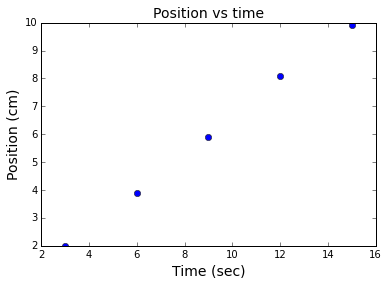

In [8]:
# create a plot of Position vs Time
plt.figure() # open a figure window
plt.plot(t1,x1,'bo') # plot x1 versus t1 using blue circles
plt.xlabel('Time (sec)',fontsize=14) # label the x axis as Time(sec)
plt.ylabel('Position (cm)',fontsize=14) # label the y axis as Position (cm)
plt.title ('Position vs time',fontsize=14) # give the plot a title
fig=plt.gcf() # store reference to this figure so we can add on to it in another cell
ax=plt.gca() # same as above - this will let us plot best-fit line in another cell

### Fit a Line to Your Data

Next, we will calculate the linear fitting coefficients using the function polyfit.  If you want to learn more about polyfit, you can create a new cell below (Insert - Cell Below) and type: 

    help(np.polyfit)

By the way, you will usually import all of the modules that you need at the beginning of a program, but we won't get too picky since this is our first time through.

In [6]:
c1=np.polyfit(t1,x1,1) # fit a polynomial to (t1,x1).  
# The number 1 tells polyfit to use a first order polynomial (x1 = a*t1 * b).
# If you wanted to fit a parabola instead of a straight line, you would replace the 1 with a 2.

The variable c1 now contains the output from polyfit.  This first element of c1 is the polynomial coefficients, with the highest power first.  

Try typing c1 in the following cell.  You should see that c1 is an array with two elements.

In [7]:
c1

array([ 1.04      , -0.09999996])

The numbers shown for c1 have many figures listed after the decimal point.  You will see this quite often in numerical computations, and it results from how computers do their math.  For the purpose of this lab and this course, *you should report 3 significant figures*, unless you are instructed otherwise.

Python uses zero-based indexing, which means that we refer to the first element of an array or list as the ** zeroth element **.

In [8]:
c1[0] # this returns the first element of the array c1, which is the coefficient of the t term

1.0399999976158143

In [9]:
c1[1] # this returns the second element of the array c1, which is the y intercept

-0.099999964237215008

So to connect the dots, we used *polyfit* to fit a straight line to our data of the form:

    x1 = a * t1 + b

where a is the slope and b is the y-intercept.  The coefficients are stored in the variable c1 such that:

    a = c1[0]
    b = c1[1]

While it's useful to see the numerical values of the coefficients, we also want to plot the line with our data to see how it looks.  Type shift-enter in the cell below to plot the line.  Be sure to read through all of the comments and try to understand exactly what each step is doing.

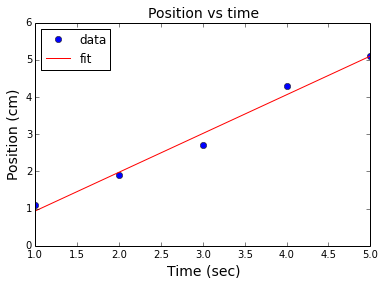

In [10]:
tt1 = np.linspace(min(t1),max(t1),100) # Create a uniformly distributed array of time values
yfit1 = np.polyval(c1,tt1) # Evaluate position for these times
#plt.sca(ax)
#plt.scf(fig)
ax.plot(tt1,yfit1,'r-')
ax.legend(('data','fit'),loc='upper left',numpoints=1) #add a legend to the final plot
fig


**Some more ipython notebook info**

We needed to add some extra commands to our code because I wanted to show you how to plot the data first, and then after some more background information, show how to plot the best-fit line.  By default, the ipython notebook forgets about any previous images once we open a new cell, so I had to add some code so that we could start the plot in one cell and finish it in another cell.  In general, we will do this all in one fell swoop, and so now I will show you the simplified code that you would use plot the data and fit the line in one cell.

*Be sure to read all of the code AND comments.  There is some useful information about changing the color of points and lines below.*

c1[0] =  1.04    c1[1] =  -0.1


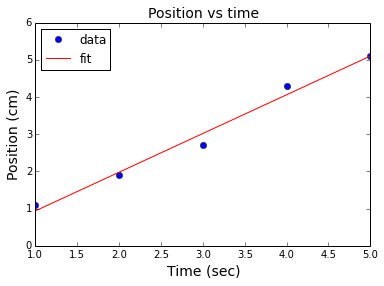

In [8]:
# import modules
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# enter your data
t1 = [1,2,3,4,5]   # time values – trial 1   
x1 = [1.1,1.9,2.7,4.3,5.1]  # position values – trial 1  
t2 = [1,2,3]  # time values – trial 2
x2 = [1,2,3]  # position values – trial 2# create a plot of Position vs Time

# convert position and time lists into arrays
x1=np.array(x1,'f')
t1=np.array(t1,'f')

# plot position vs time for dataset 1
plt.figure()
plt.plot(t1,x1,'bo') # plot x1 versus t1 using blue circles
plt.xlabel('Time (sec)',fontsize=14) # label the x axis as Time(sec)
plt.ylabel('Position (cm)',fontsize=14) # label the y axis as Position (cm)
plt.title ('Position vs time',fontsize=14) # give the plot a title

# fit a line to the data
c1=np.polyfit(t1,x1,1)
tt1 = np.linspace(min(t1),max(t1),100) # Create a uniformly distributed array of time values
yfit1 = np.polyval(c1,tt1) # Evaluate position for these times

# plot the best-fit line
plt.plot(tt1,yfit1,'r-') # 'r-' means use a red solid line; change this to 'r--' and see what happens
# also, you can change the color by replacing the 'r' with something else.  Here are a few options:
#     b = blue
#     m = magenta
#     k = black
#     g = green
plt.legend(('data','fit'),loc='upper left',numpoints=1) #add a legend to the final plot
print 'c1[0] = ', c1[0], '   c1[1] = ', c1[1] 

### Now it's your turn...

Determine the necessary MatLab commands to plot the second data set with a different colored line. Add your program to the cell below.  You can copy and paste from previous code as needed.

In [12]:
# enter your code here!


When you are finished, save your notebook.  You should choose a name for it that you will remember, such as “BuggyLab”, and save it to your username, Desktop, or personal flash drive.  

Report your two values of slope to your instructor to find class statistics for buggy speed.  Answer Data Analysis Questions 3-12 while you await the data from the other groups.  Complete the Statistical Analysis exercise and questions below once you have the data from all groups. 

### Statistical Analysis

When the buggy velocity data for both trials of all groups are available, it is possible to evaluate some statistical quantities.  You will calculate the statistical quantities of mean, standard deviation, and standard error and plot a histogram in the cell below.  Update the code to include the values of velocity from your class, and press shift-enter at any time to check the code.

    # Statistics on Buggy Velocity
    N=16    # Total number of trials (adjust for actual number)
    v=[ enter the individual values of speed here  ]
    avg=np.mean(v)        
    vstd= np.std(v)   # Standard Deviation of v 
    
This analysis assumes that all of the buggies should travel at approximately the same rate.  This means that the values of velocity should be evenly distributed around the mean velocity, and the standard deviation, $$\sigma$$, represents the width of that distribution.  In other words, it is a numerical estimate of the extent to which random differences in the experiment affect the value of speed.   The standard error, or statistical uncertainty in the speed, is related to the standard deviation:

$$\bar{\sigma} = \frac{\sigma}{\sqrt{N}} $$ 

Where the average speed is expressed with the uncertainty:  

$$v_{avg} \pm \bar{\sigma} $$     

To determine this value:
      
      vste= vstd/np.sqrt(N)   # Standard Error of v 

To visualize the actual distribution of data, plot a histogram: 
      
      plt.hist(v,bins=10) 

Where nbins is the number of bin ranges into which the data values can be sorted.   If you issue plt.hist(v) this command will plot a histogram in 10 evenly spaced bins, or you can adjust the number of bins by altering nbins.  Try several values of nbins until you make a distribution that you feel best illustrates the data.  

output statistics: 
	 ave vel   =  3.0875
	 std vel   =  0.52190157118
	 std error =  0.130475392795


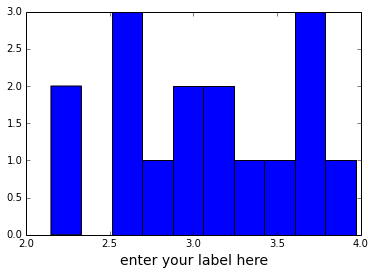

In [13]:
# Statistics on Buggy Velocity
N=16.    # Total number of trials (adjust for actual number)

# Below is a test dataset.  Replace these values with the speed measurements from your class.
v=[3.21, 3.74, 2.99, 2.56,  
   2.31, 3.66, 2.61, 2.69,
   3.97, 3.34, 3.64, 3.03,
   3.12,  2.83,  3.55, 2.15] 
vavg=np.mean(v)        
vstd= np.std(v)   # Standard Deviation of v 
vste= vstd/np.sqrt(N)
print 'output statistics: '
print '\t ave vel   = ',vavg
print '\t std vel   = ',vstd
print '\t std error = ',vste
plt.hist(v,bins=10)
plt.xlabel('enter your label here',fontsize=14)


### Finishing Up and Submitting Your Results

After you finish your histogram, complete the Data Analysis questions 13-16 in the lab handout.

Ask your instructor how she/he wants you to turn in the notebook.  You might have to upload your file to blackboard or email a pdf to your instructor.

** Instructions to save your notebook as a pdf **

** Instructions to upload the ipynb file to blackboard **